In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from collections import deque
from sklearn.model_selection import train_test_split
import numpy as np
import pickle

import cv2

import os
import pickle
from os.path import join, exists
from tqdm import tqdm
from google.colab.patches import cv2_imshow
import numpy as np

from datetime import timedelta
import numpy as np
import tensorflow as tf
import time

In [ ]:
#############DO NOT EXECUTE EVERY TIME########################
import os
import shutil
  
source = '/content/drive/MyDrive/LSAvideos/CNN_Train_Output_Part2/'
destination = '/content/drive/MyDrive/LSAvideos/CNN_Train_Output_Part1/'
  
allfiles = os.listdir(source)

for f in allfiles:
  shutil.move(source + f, destination + f)

In [ ]:
train_videos_loc = "/content/drive/MyDrive/LSAvideos/all"
train_videos = os.listdir(train_videos_loc)

train_videos.sort()

In [ ]:
for i, val in enumerate(train_videos):
  temp1 = val.split(".")
  print(temp1[0])
  
print("Number of Training Videos: ", len(train_videos))

001_001_002
001_001_003
001_002_001
001_002_002
001_002_003
001_003_001
001_003_002
001_003_003
001_004_001
001_004_003
001_005_002
001_005_003
003_001_001
003_001_002
003_001_003
003_002_001
003_002_003
003_003_001
003_003_002
003_003_003
003_004_001
003_004_003
003_005_001
003_005_002
003_005_003
004_001_001
004_001_002
004_001_003
004_002_001
004_002_003
004_003_001
004_003_003
004_004_002
004_004_003
004_005_001
004_005_002
005_001_001
005_001_003
005_002_001
005_002_002
005_002_003
005_003_001
005_003_002
005_003_003
005_004_001
005_004_002
005_005_001
005_005_003
006_001_001
006_001_003
006_002_001
006_002_002
006_002_003
006_003_001
006_003_002
006_003_003
006_004_001
006_005_001
006_005_002
006_005_003
007_001_001
007_001_002
007_002_001
007_002_002
007_002_003
007_003_001
007_003_002
007_004_001
007_004_002
007_005_002
008_001_001
008_001_002
008_001_003
008_002_002
008_002_003
008_003_002
008_003_003
008_004_001
008_004_002
008_004_003
008_005_001
008_005_003
009_001_001
009_

In [ ]:
CNN_frames_loc = "/content/drive/MyDrive/LSAvideos/CNN_Train_Output_Part1"
CNN_frames = os.listdir(CNN_frames_loc)

In [ ]:
for i in range(len(CNN_frames)):
  temp2 = CNN_frames[i].split(".")[0][0:11]
  print(temp2)

Streaming output truncated to the last 5000 lines.
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
003_005_001
0

In [ ]:
len(CNN_frames)

54000

In [ ]:
video_frame_map = {}

for i in range(len(train_videos)):
  temp1 = train_videos[i].split(".")[0]
  
  templist = []

  for frame in CNN_frames:
    if frame.split(".")[0][0:11] == temp1:
      templist.append(frame)
  
  
  if len(templist) != 0: 
    video_frame_map.update({temp1 : templist})

In [ ]:
for item in video_frame_map.items():
  print(item)

('001_001_002', ['001_001_002_1.jpg.npy', '001_001_002_10.jpg.npy', '001_001_002_100.jpg.npy', '001_001_002_101.jpg.npy', '001_001_002_102.jpg.npy', '001_001_002_103.jpg.npy', '001_001_002_104.jpg.npy', '001_001_002_105.jpg.npy', '001_001_002_106.jpg.npy', '001_001_002_107.jpg.npy', '001_001_002_108.jpg.npy', '001_001_002_109.jpg.npy', '001_001_002_11.jpg.npy', '001_001_002_110.jpg.npy', '001_001_002_111.jpg.npy', '001_001_002_112.jpg.npy', '001_001_002_113.jpg.npy', '001_001_002_114.jpg.npy', '001_001_002_115.jpg.npy', '001_001_002_116.jpg.npy', '001_001_002_117.jpg.npy', '001_001_002_118.jpg.npy', '001_001_002_119.jpg.npy', '001_001_002_12.jpg.npy', '001_001_002_120.jpg.npy', '001_001_002_121.jpg.npy', '001_001_002_122.jpg.npy', '001_001_002_123.jpg.npy', '001_001_002_124.jpg.npy', '001_001_002_125.jpg.npy', '001_001_002_126.jpg.npy', '001_001_002_127.jpg.npy', '001_001_002_128.jpg.npy', '001_001_002_129.jpg.npy', '001_001_002_13.jpg.npy', '001_001_002_130.jpg.npy', '001_001_002_131.

In [ ]:
temp = []

for x in video_frame_map.values():
  print(x)
  temp = x
  break

['001_001_002_1.jpg.npy', '001_001_002_10.jpg.npy', '001_001_002_100.jpg.npy', '001_001_002_101.jpg.npy', '001_001_002_102.jpg.npy', '001_001_002_103.jpg.npy', '001_001_002_104.jpg.npy', '001_001_002_105.jpg.npy', '001_001_002_106.jpg.npy', '001_001_002_107.jpg.npy', '001_001_002_108.jpg.npy', '001_001_002_109.jpg.npy', '001_001_002_11.jpg.npy', '001_001_002_110.jpg.npy', '001_001_002_111.jpg.npy', '001_001_002_112.jpg.npy', '001_001_002_113.jpg.npy', '001_001_002_114.jpg.npy', '001_001_002_115.jpg.npy', '001_001_002_116.jpg.npy', '001_001_002_117.jpg.npy', '001_001_002_118.jpg.npy', '001_001_002_119.jpg.npy', '001_001_002_12.jpg.npy', '001_001_002_120.jpg.npy', '001_001_002_121.jpg.npy', '001_001_002_122.jpg.npy', '001_001_002_123.jpg.npy', '001_001_002_124.jpg.npy', '001_001_002_125.jpg.npy', '001_001_002_126.jpg.npy', '001_001_002_127.jpg.npy', '001_001_002_128.jpg.npy', '001_001_002_129.jpg.npy', '001_001_002_13.jpg.npy', '001_001_002_130.jpg.npy', '001_001_002_131.jpg.npy', '001_0

In [ ]:
temp1 = []

for x in temp:
  temp1.append(x.split(".")[0])

In [ ]:
temp1.sort(key=int)

In [ ]:
for key, values in video_frame_map.items():
  #print(key, values)

  temp = []
  temp = values

  #print(temp)

  temp1 = [] 

  for x in temp:
    temp1.append(x.split(".")[0])

  temp1.sort(key=int)

  video_frame_map.update({key : temp1})

In [ ]:
for item in video_frame_map.items():
  print(item)

('001_001_002', ['001_001_002_1', '001_001_002_2', '001_001_002_3', '001_001_002_4', '001_001_002_5', '001_001_002_6', '001_001_002_7', '001_001_002_8', '001_001_002_9', '001_001_002_10', '001_001_002_11', '001_001_002_12', '001_001_002_13', '001_001_002_14', '001_001_002_15', '001_001_002_16', '001_001_002_17', '001_001_002_18', '001_001_002_19', '001_001_002_20', '001_001_002_21', '001_001_002_22', '001_001_002_23', '001_001_002_24', '001_001_002_25', '001_001_002_26', '001_001_002_27', '001_001_002_28', '001_001_002_29', '001_001_002_30', '001_001_002_31', '001_001_002_32', '001_001_002_33', '001_001_002_34', '001_001_002_35', '001_001_002_36', '001_001_002_37', '001_001_002_38', '001_001_002_39', '001_001_002_40', '001_001_002_41', '001_001_002_42', '001_001_002_43', '001_001_002_44', '001_001_002_45', '001_001_002_46', '001_001_002_47', '001_001_002_48', '001_001_002_49', '001_001_002_50', '001_001_002_51', '001_001_002_52', '001_001_002_53', '001_001_002_54', '001_001_002_55', '0

**Saving Feature Vector in pickle file - feature_vector_dict**

In [ ]:
import pickle

In [ ]:
CNN_frames_loc = "/content/drive/MyDrive/LSAvideos/CNN_Train_Output_Part1"

pickle_out = open("/content/drive/MyDrive/LSAvideos/feature_vector_dict.pkl", "wb")

temp_dict = {}

for key, values in video_frame_map.items():
  print(key)
  
  for value in values:
    temp = np.load(CNN_frames_loc + "/" + value + ".jpg.npy")
    temp_dict.update({value : temp})

pickle.dump(temp_dict, pickle_out)
pickle_out.close()

001_001_002
001_001_003
001_002_001
001_002_002
001_002_003
001_003_001
001_003_002
001_003_003
001_004_001
001_004_003
001_005_002
001_005_003
003_001_001
003_001_002
003_001_003
003_002_001
003_002_003
003_003_001
003_003_002
003_003_003
003_004_001
003_004_003
003_005_001
003_005_002
003_005_003
004_001_001
004_001_002
004_001_003
004_002_001
004_002_003
004_003_001
004_003_003
004_004_002
004_004_003
004_005_001
004_005_002
005_001_001
005_001_003
005_002_001
005_002_002
005_002_003
005_003_001
005_003_002
005_003_003
005_004_001
005_004_002
005_005_001
005_005_003
006_001_001
006_001_003
006_002_001
006_002_002
006_002_003
006_003_001
006_003_002
006_003_003
006_004_001
006_005_001
006_005_002
006_005_003
007_001_001
007_001_002
007_002_001
007_002_002
007_002_003
007_003_001
007_003_002
007_004_001
007_004_002
007_005_002
008_001_001
008_001_002
008_001_003
008_002_002
008_002_003
008_003_002
008_003_003
008_004_001
008_004_002
008_004_003
008_005_001
008_005_003
009_001_001
009_

OSError: ignored

In [ ]:
pickle.dump(temp_dict, pickle_out)
pickle_out.close()

In [ ]:
LSAvideos_loc = "/content/drive/MyDrive/LSAvideos/"
files = os.listdir(LSAvideos_loc)
files

['all',
 'Sample_Videos',
 'Frames_sample',
 'Test_Videos',
 'Train_Frames',
 'Test_Frames',
 'CNN_Train_Output_Part2',
 'CNN_Train_Output_Part1',
 '.ipynb_checkpoints',
 'feature_vector_dict.pkl']

In [ ]:
print(len(temp_dict))

35186


In [ ]:
CNN_frames_loc = "/content/drive/MyDrive/LSAvideos/CNN_Train_Output_Part1"

pickle_out = open("/content/drive/MyDrive/LSAvideos/feature_vector_dict.pkl", "wb")

In [ ]:
for key, values in video_frame_map.items():
  print(key)
  temp1 = key.split("_")
  if int(temp1[0]) > 17:
    for value in values:
      temp = np.load(CNN_frames_loc + "/" + value + ".jpg.npy")
      temp_dict.update({value : temp})
    

001_001_002
001_001_003
001_002_001
001_002_002
001_002_003
001_003_001
001_003_002
001_003_003
001_004_001
001_004_003
001_005_002
001_005_003
003_001_001
003_001_002
003_001_003
003_002_001
003_002_003
003_003_001
003_003_002
003_003_003
003_004_001
003_004_003
003_005_001
003_005_002
003_005_003
004_001_001
004_001_002
004_001_003
004_002_001
004_002_003
004_003_001
004_003_003
004_004_002
004_004_003
004_005_001
004_005_002
005_001_001
005_001_003
005_002_001
005_002_002
005_002_003
005_003_001
005_003_002
005_003_003
005_004_001
005_004_002
005_005_001
005_005_003
006_001_001
006_001_003
006_002_001
006_002_002
006_002_003
006_003_001
006_003_002
006_003_003
006_004_001
006_005_001
006_005_002
006_005_003
007_001_001
007_001_002
007_002_001
007_002_002
007_002_003
007_003_001
007_003_002
007_004_001
007_004_002
007_005_002
008_001_001
008_001_002
008_001_003
008_002_002
008_002_003
008_003_002
008_003_003
008_004_001
008_004_002
008_004_003
008_005_001
008_005_003
009_001_001
009_

In [ ]:
len(temp_dict)

54000

In [ ]:
pickle_out = open("/content/drive/MyDrive/LSAvideos/feature_vector.pkl", "wb")
pickle.dump(temp_dict, pickle_out)
pickle_out.close()

In [ ]:
with open('/content/drive/MyDrive/LSAvideos/feature_vector.pkl', 'rb') as pickle_in:
     unpickled_dict = pickle.load(pickle_in)

In [ ]:
for item in unpickled_dict.items():
  print(item)

Streaming output truncated to the last 5000 lines.
('025_005_002_21', array([0.55416405, 0.62361264, 0.07549118, ..., 0.38764507, 1.0072675 ,
       0.20419598], dtype=float32))
('025_005_002_22', array([0.54000676, 0.6836846 , 0.07438723, ..., 0.38248938, 0.9295101 ,
       0.12187895], dtype=float32))
('025_005_002_23', array([0.69079113, 0.8946241 , 0.0807781 , ..., 0.3311486 , 0.84019506,
       0.17140248], dtype=float32))
('025_005_002_24', array([0.6472502 , 0.65823126, 0.07419449, ..., 0.37877446, 0.90798146,
       0.1055577 ], dtype=float32))
('025_005_002_25', array([0.7202041 , 0.45895627, 0.07927963, ..., 0.5004129 , 0.9787844 ,
       0.05966569], dtype=float32))
('025_005_002_26', array([0.5688885 , 0.5584099 , 0.07813412, ..., 0.6244706 , 1.2246308 ,
       0.12484738], dtype=float32))
('025_005_002_27', array([0.54796624, 0.58500856, 0.07760983, ..., 0.49412614, 1.0129468 ,
       0.09016626], dtype=float32))
('025_005_002_28', array([0.56098896, 0.55209196, 0.08536715

In [ ]:
temp_dict = unpickled_dict

**Target Label Processing - 25 Words**

In [ ]:
target_label = [['001', 'Opaque'], ['003', 'Green'], ['004', 'Yellow'], ['005', 'Bright'], ['006', 'Light-blue'], ['007', 'Colors'], ['008', 'Red'], ['009', 'Women'],
                ['010', 'Enemy'], ['011', 'Son'], ['012', 'Man'], ['013', 'Away'], ['014', 'Drawer'], ['015', 'Born'], ['016', 'Learn'], ['017', 'Call'], ['018', 'Skimmer'], 
                ['019', 'Bitter'], ['020', 'Sweet milk'], ['021', 'Milk'], ['022', 'Water'], ['023', 'Food'], ['024', 'Argentina'], ['025', 'Uruguay'], ['026', 'Country']]
target_label

[['001', 'Opaque'],
 ['003', 'Green'],
 ['004', 'Yellow'],
 ['005', 'Bright'],
 ['006', 'Light-blue'],
 ['007', 'Colors'],
 ['008', 'Red'],
 ['009', 'Women'],
 ['010', 'Enemy'],
 ['011', 'Son'],
 ['012', 'Man'],
 ['013', 'Away'],
 ['014', 'Drawer'],
 ['015', 'Born'],
 ['016', 'Learn'],
 ['017', 'Call'],
 ['018', 'Skimmer'],
 ['019', 'Bitter'],
 ['020', 'Sweet milk'],
 ['021', 'Milk'],
 ['022', 'Water'],
 ['023', 'Food'],
 ['024', 'Argentina'],
 ['025', 'Uruguay'],
 ['026', 'Country']]

In [ ]:
target_label_map = {}

for i in range(len(train_videos)):
  temp1 = train_videos[i].split(".")[0]
  temp2 = temp1.split("_")[0]

  for val in target_label:
    if temp2 == val[0]:
      target_label_map.update({temp1 : val[1]})

In [ ]:
for item in target_label_map.items():
  print(item)

('001_001_002', 'Opaque')
('001_001_003', 'Opaque')
('001_002_001', 'Opaque')
('001_002_002', 'Opaque')
('001_002_003', 'Opaque')
('001_003_001', 'Opaque')
('001_003_002', 'Opaque')
('001_003_003', 'Opaque')
('001_004_001', 'Opaque')
('001_004_003', 'Opaque')
('001_005_002', 'Opaque')
('001_005_003', 'Opaque')
('003_001_001', 'Green')
('003_001_002', 'Green')
('003_001_003', 'Green')
('003_002_001', 'Green')
('003_002_003', 'Green')
('003_003_001', 'Green')
('003_003_002', 'Green')
('003_003_003', 'Green')
('003_004_001', 'Green')
('003_004_003', 'Green')
('003_005_001', 'Green')
('003_005_002', 'Green')
('003_005_003', 'Green')
('004_001_001', 'Yellow')
('004_001_002', 'Yellow')
('004_001_003', 'Yellow')
('004_002_001', 'Yellow')
('004_002_003', 'Yellow')
('004_003_001', 'Yellow')
('004_003_003', 'Yellow')
('004_004_002', 'Yellow')
('004_004_003', 'Yellow')
('004_005_001', 'Yellow')
('004_005_002', 'Yellow')
('005_001_001', 'Bright')
('005_001_003', 'Bright')
('005_002_001', 'Bright')

In [ ]:
def load_labels(label_list):
    label = {}
    
    count = 0

    for i, val in enumerate(label_list):
        label[val[1]] = count
        count += 1

    return label

In [ ]:
labels = load_labels(target_label)
print(len(labels))
labels

25


{'Argentina': 22,
 'Away': 11,
 'Bitter': 17,
 'Born': 13,
 'Bright': 3,
 'Call': 15,
 'Colors': 5,
 'Country': 24,
 'Drawer': 12,
 'Enemy': 8,
 'Food': 21,
 'Green': 1,
 'Learn': 14,
 'Light-blue': 4,
 'Man': 10,
 'Milk': 19,
 'Opaque': 0,
 'Red': 6,
 'Skimmer': 16,
 'Son': 9,
 'Sweet milk': 18,
 'Uruguay': 23,
 'Water': 20,
 'Women': 7,
 'Yellow': 2}

In [ ]:
print(len(video_frame_map))
print(len(target_label_map))

300
300


**Combining feature vector and target label to pass it to the LSTM Network**

In [ ]:
num_classes = len(labels)
num_frames_per_video = 180
input_size = 2048
print(num_classes, input_size, num_frames_per_video)

25 2048 180


In [ ]:
CNN_frames_loc = "/content/drive/MyDrive/LSAvideos/CNN_Train_Output_Part1"

X = []
y = []

temp_list = deque()

In [ ]:

for key, value in video_frame_map.items():
  print(key)
  frames = value

  for i, frame in enumerate(frames):
    features = temp_dict[frame]
    
    actual_label = target_label_map[key]
    binary_label = labels[actual_label]

    if len(temp_list) == num_frames_per_video - 1:
      temp_list.append(features)
      flat = list(temp_list)
      X.append(np.array(flat))
      y.append(binary_label)
      temp_list.clear()
    else:
      temp_list.append(features)
      continue

X = np.array(X)
y = np.array(y)

y = tf.keras.utils.to_categorical(y, num_classes, dtype ="uint8")

001_001_002
001_001_003
001_002_001
001_002_002
001_002_003
001_003_001
001_003_002
001_003_003
001_004_001
001_004_003
001_005_002
001_005_003
003_001_001
003_001_002
003_001_003
003_002_001
003_002_003
003_003_001
003_003_002
003_003_003
003_004_001
003_004_003
003_005_001
003_005_002
003_005_003
004_001_001
004_001_002
004_001_003
004_002_001
004_002_003
004_003_001
004_003_003
004_004_002
004_004_003
004_005_001
004_005_002
005_001_001
005_001_003
005_002_001
005_002_002
005_002_003
005_003_001
005_003_002
005_003_003
005_004_001
005_004_002
005_005_001
005_005_003
006_001_001
006_001_003
006_002_001
006_002_002
006_002_003
006_003_001
006_003_002
006_003_003
006_004_001
006_005_001
006_005_002
006_005_003
007_001_001
007_001_002
007_002_001
007_002_002
007_002_003
007_003_001
007_003_002
007_004_001
007_004_002
007_005_002
008_001_001
008_001_002
008_001_003
008_002_002
008_002_003
008_003_002
008_003_003
008_004_001
008_004_002
008_004_003
008_005_001
008_005_003
009_001_001
009_

In [ ]:
print(X.shape)

(300, 180, 2048)


In [ ]:
print(y.shape)
print(y)

(300, 25)
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


**LSTM NETWORK**

In [ ]:
def rnn_temporal_features(frames, input_size, num_classes):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.Input(shape=[frames, input_size]))
  model.add(tf.keras.layers.LSTM(256, dropout=0.2))
  model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

  model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

  return model

In [ ]:
temporal_features_model = rnn_temporal_features(num_frames_per_video, input_size, num_classes)
temporal_features_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               2360320   
                                                                 
 dense (Dense)               (None, 25)                6425      
                                                                 
Total params: 2,366,745
Trainable params: 2,366,745
Non-trainable params: 0
_________________________________________________________________


#FIRST TRAINED MODEL

**TRAINING THE LSTM NETWORK (Temporal Feature Extraction)**

In [ ]:
num_classes = len(labels)
size_of_each_frame = X.shape[2]
Batch_Size = 32
num_epochs = 20

lstm_model = rnn_temporal_features(num_frames_per_video, size_of_each_frame, num_classes)

lstm_model.fit(X, y, batch_size=Batch_Size, epochs = num_epochs, verbose="auto")

Epoch 1/20
10/10 [==============================] - 20s 2s/step - loss: 2.7743 - accuracy: 0.2900
Epoch 2/20
10/10 [==============================] - 17s 2s/step - loss: 1.4704 - accuracy: 0.7200
Epoch 3/20
10/10 [==============================] - 17s 2s/step - loss: 1.0100 - accuracy: 0.8500
Epoch 4/20
10/10 [==============================] - 17s 2s/step - loss: 0.9480 - accuracy: 0.8167
Epoch 5/20
10/10 [==============================] - 17s 2s/step - loss: 0.8247 - accuracy: 0.8467
Epoch 6/20
10/10 [==============================] - 17s 2s/step - loss: 0.6713 - accuracy: 0.9000
Epoch 7/20
10/10 [==============================] - 17s 2s/step - loss: 0.6055 - accuracy: 0.9300
Epoch 8/20
10/10 [==============================] - 17s 2s/step - loss: 0.5524 - accuracy: 0.9300
Epoch 9/20
10/10 [==============================] - 17s 2s/step - loss: 0.4830 - accuracy: 0.9367
Epoch 10/20
10/10 [==============================] - 17s 2s/step - loss: 0.4391 - accuracy: 0.9500
Epoch 11/20
10/10 [

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Testing on few examples**

***First Example***

In [ ]:
pip install gTTs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from IPython.display import HTML
from base64 import b64encode
import gtts
from gtts import gTTS
from IPython.display import Audio 

In [ ]:
test_video_name = '010_001_001'
test_frames_names = video_frame_map[test_video_name]

In [ ]:
mp4 = open('/content/drive/MyDrive/LSAvideos/all/' + test_video_name + '.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
print("Correct label for video ", test_video_name, "is: ", target_label_map[test_video_name])

Correct label for video  010_001_001 is:  Enemy


In [ ]:
test_X = []
test_y = []
temp_list = deque()

In [ ]:
for frame in test_frames_names:
  features = temp_dict[frame]
    
  actual_label = target_label_map[test_video_name]
  binary_label = labels[actual_label]

  if len(temp_list) == num_frames_per_video - 1:
    temp_list.append(features)
    flat = list(temp_list)
    test_X.append(np.array(flat))
    test_y.append(binary_label)
    temp_list.clear()
  else:
    temp_list.append(features)
    continue

test_X = np.array(test_X)
test_y = np.array(test_y)

test_y = tf.keras.utils.to_categorical(test_y, num_classes, dtype ="uint8")

In [ ]:
predictions = lstm_model.predict(test_X)
predictions

array([[1.2060073e-02, 3.8098355e-03, 1.3136702e-03, 3.0242521e-04,
        2.6937095e-03, 7.1864628e-04, 2.8903654e-03, 7.8477437e-04,
        8.9479935e-01, 2.0550816e-04, 1.0868764e-03, 8.6738300e-03,
        3.0128623e-04, 2.0092052e-04, 5.4397928e-03, 5.1197235e-02,
        7.5369887e-04, 4.0081609e-03, 5.1725754e-05, 4.3901612e-04,
        4.0826993e-03, 1.2697382e-03, 9.9904311e-04, 1.2409482e-03,
        6.7665230e-04]], dtype=float32)

In [ ]:
predictions = np.array([np.argmax(pred) for pred in predictions])
test_y = np.array([np.argmax(each) for each in test_y])

In [ ]:
result = ""
for key, value in labels.items():
  if value == test_y[0]:
    result = key
    print("Predicted label for video ", test_video_name, "is: ", key)
    break

Predicted label for video  010_001_001 is:  Enemy


In [ ]:
tts = gTTS(key)
tts.save('1.wav')
sound_file = '1.wav'

print("Audio output of predicted word: ")
Audio(sound_file, autoplay=True) 

Audio output of predicted word: 


***Second Example***

In [ ]:
test_video_name = '016_005_002'
test_frames_names = video_frame_map[test_video_name]

In [ ]:
mp4 = open('/content/drive/MyDrive/LSAvideos/all/' + test_video_name + '.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
print("Correct label for video ", test_video_name, "is: ", target_label_map[test_video_name])

Correct label for video  016_005_002 is:  Learn


In [ ]:
test_X = []
test_y = []
temp_list = deque()

In [ ]:
for frame in test_frames_names:
  features = temp_dict[frame]
    
  actual_label = target_label_map[test_video_name]
  binary_label = labels[actual_label]

  if len(temp_list) == num_frames_per_video - 1:
    temp_list.append(features)
    flat = list(temp_list)
    test_X.append(np.array(flat))
    test_y.append(binary_label)
    temp_list.clear()
  else:
    temp_list.append(features)
    continue

test_X = np.array(test_X)
test_y = np.array(test_y)

test_y = tf.keras.utils.to_categorical(test_y, num_classes, dtype ="uint8")

In [ ]:
predictions = lstm_model.predict(test_X)
predictions

array([[1.4396824e-03, 6.6214619e-04, 2.3684648e-04, 4.9486017e-04,
        1.3538270e-03, 5.7351246e-04, 1.5898421e-04, 3.7540121e-03,
        1.8237307e-03, 1.0005396e-03, 1.2626802e-03, 1.3599463e-03,
        2.5637457e-04, 1.2824213e-03, 9.6154600e-01, 4.1591488e-03,
        2.4944244e-04, 1.4917214e-03, 2.0521255e-03, 4.5691596e-04,
        2.8958989e-04, 1.5557988e-04, 1.2754089e-03, 1.1208479e-02,
        1.4560911e-03]], dtype=float32)

In [ ]:
predictions = np.array([np.argmax(pred) for pred in predictions])
test_y = np.array([np.argmax(each) for each in test_y])

In [ ]:
result = ""
for key, value in labels.items():
  if value == test_y[0]:
    result = key
    print("Predicted label for video ", test_video_name, "is: ", key)
    break

Predicted label for video  016_005_002 is:  Learn


In [ ]:
tts = gTTS(key)
tts.save('1.wav')
sound_file = '1.wav'

print("Audio output of predicted word: ")
Audio(sound_file, autoplay=True) 

Audio output of predicted word: 


***Third Example***

In [ ]:
test_video_name = '026_004_003'
test_frames_names = video_frame_map[test_video_name]

In [ ]:
mp4 = open('/content/drive/MyDrive/LSAvideos/all/' + test_video_name + '.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
print("Correct label for video ", test_video_name, "is: ", target_label_map[test_video_name])

Correct label for video  026_004_003 is:  Country


In [ ]:
test_X = []
test_y = []
temp_list = deque()

for frame in test_frames_names:
  features = temp_dict[frame]
    
  actual_label = target_label_map[test_video_name]
  binary_label = labels[actual_label]

  if len(temp_list) == num_frames_per_video - 1:
    temp_list.append(features)
    flat = list(temp_list)
    test_X.append(np.array(flat))
    test_y.append(binary_label)
    temp_list.clear()
  else:
    temp_list.append(features)
    continue

test_X = np.array(test_X)
test_y = np.array(test_y)

test_y = tf.keras.utils.to_categorical(test_y, num_classes, dtype ="uint8")

In [ ]:
predictions = lstm_model.predict(test_X)
predictions

array([[1.4071391e-03, 4.5366702e-03, 2.3190111e-03, 5.5453749e-03,
        4.2420640e-04, 3.2786415e-03, 1.9069690e-04, 1.4751565e-03,
        2.3953780e-03, 3.2916244e-03, 1.1754369e-03, 2.2828993e-03,
        3.0110918e-03, 1.3178036e-02, 1.0841042e-03, 2.9440213e-04,
        2.2611385e-03, 4.9411929e-03, 1.5647848e-03, 2.5830872e-03,
        6.0295160e-03, 4.8503008e-02, 4.1475780e-03, 1.2716996e-03,
        8.8280815e-01]], dtype=float32)

In [ ]:
predictions = np.array([np.argmax(pred) for pred in predictions])
test_y = np.array([np.argmax(each) for each in test_y])

In [ ]:
result = ""
for key, value in labels.items():
  if value == test_y[0]:
    result = key
    print("Predicted label for video ", test_video_name, "is: ", key)
    break

Predicted label for video  026_004_003 is:  Country


In [ ]:
tts = gTTS(key)
tts.save('1.wav')
sound_file = '1.wav'

print("Audio output of predicted word: ")
Audio(sound_file, autoplay=True) 

Audio output of predicted word: 


***FOURTH EXAMPLE***

In [ ]:
test_video_name = '022_003_003'
test_frames_names = video_frame_map[test_video_name]

In [ ]:
mp4 = open('/content/drive/MyDrive/LSAvideos/all/' + test_video_name + '.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
print("Correct label for video ", test_video_name, "is: ", target_label_map[test_video_name])

Correct label for video  022_003_003 is:  Water


In [ ]:
test_X = []
test_y = []
temp_list = deque()

for frame in test_frames_names:
  features = temp_dict[frame]
    
  actual_label = target_label_map[test_video_name]
  binary_label = labels[actual_label]

  if len(temp_list) == num_frames_per_video - 1:
    temp_list.append(features)
    flat = list(temp_list)
    test_X.append(np.array(flat))
    test_y.append(binary_label)
    temp_list.clear()
  else:
    temp_list.append(features)
    continue

test_X = np.array(test_X)
test_y = np.array(test_y)

test_y = tf.keras.utils.to_categorical(test_y, num_classes, dtype ="uint8")

In [ ]:
predictions = lstm_model.predict(test_X)
predictions

array([[1.3564135e-03, 1.1139299e-03, 5.9475430e-04, 1.7881213e-03,
        1.6948808e-03, 2.5273561e-03, 2.4834212e-03, 2.1697888e-03,
        2.2699518e-02, 5.9407041e-03, 2.9764841e-03, 2.5587655e-03,
        1.8943335e-03, 6.3130207e-04, 1.7520039e-04, 7.5867702e-04,
        7.3648809e-04, 3.0012571e-03, 6.7623402e-03, 1.1280244e-03,
        9.1454118e-01, 1.5920240e-02, 9.9689700e-04, 6.4268423e-04,
        4.9071447e-03]], dtype=float32)

In [ ]:
predictions = np.array([np.argmax(pred) for pred in predictions])
test_y = np.array([np.argmax(each) for each in test_y])

In [ ]:
result = ""
for key, value in labels.items():
  if value == test_y[0]:
    result = key
    print("Predicted label for video ", test_video_name, "is: ", key)
    break

Predicted label for video  022_003_003 is:  Water


In [ ]:
tts = gTTS(key)
tts.save('1.wav')
sound_file = '1.wav'

print("Audio output of predicted word: ")
Audio(sound_file, autoplay=True) 

Audio output of predicted word: 


***SAVING LSTM NETWORK MODEL***

In [ ]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               2360320   
                                                                 
 dense_1 (Dense)             (None, 25)                6425      
                                                                 
Total params: 2,366,745
Trainable params: 2,366,745
Non-trainable params: 0
_________________________________________________________________


In [ ]:
!mkdir -p saved_model

In [ ]:
pwd

'/content'

In [ ]:
lstm_model.save('/content/drive/MyDrive/saved_model/cip_model1') 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved_model/cip_model1/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved_model/cip_model1/assets


In [ ]:
dest = "/content/drive/MyDrive"

In [ ]:
os.chdir(dest)

In [ ]:
pwd

'/content/drive/MyDrive'

In [ ]:
!ls saved_model

# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_model/cip_model1

assets	cip_model1  keras_metadata.pb  saved_model.pb  variables
assets	keras_metadata.pb  saved_model.pb  variables


***SAVING MODEL IN PICKLE FILE***

In [ ]:
pickle_out = open("/content/drive/MyDrive/LSAvideos/lstmModel.pkl", "wb")
pickle.dump(lstm_model, pickle_out)
pickle_out.close()

INFO:tensorflow:Assets written to: ram://38f1878b-6826-48c9-8d0d-6c8e6abdec72/assets


INFO:tensorflow:Assets written to: ram://38f1878b-6826-48c9-8d0d-6c8e6abdec72/assets


In [ ]:
pickle_out =""


In [ ]:
with open('/content/drive/MyDrive/LSAvideos/lstmModel.pkl', 'rb') as pickle_in:
     unpickled_model = pickle.load(pickle_in)

In [ ]:
unpickled_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               2360320   
                                                                 
 dense_1 (Dense)             (None, 25)                6425      
                                                                 
Total params: 2,366,745
Trainable params: 2,366,745
Non-trainable params: 0
_________________________________________________________________


#NEWLY TRAINED MODEL

**Combining feature vector and target label to pass it to the LSTM Network**

In [ ]:
num_classes = len(labels)
num_frames_per_video = 180
input_size = 2048
print(num_classes, input_size, num_frames_per_video)

25 2048 180


In [ ]:
CNN_frames_loc = "/content/drive/MyDrive/LSAvideos/CNN_Train_Output_Part1"

X = []
y = []

temp_list = deque()

In [ ]:

for key, value in video_frame_map.items():
  print(key)
  frames = value

  for i, frame in enumerate(frames):
    features = temp_dict[frame]
    
    actual_label = target_label_map[key]
    binary_label = labels[actual_label]

    if len(temp_list) == num_frames_per_video - 1:
      temp_list.append(features)
      flat = list(temp_list)
      X.append(np.array(flat))
      y.append(binary_label)
      temp_list.clear()
    else:
      temp_list.append(features)
      continue

X = np.array(X)
y = np.array(y)

y = tf.keras.utils.to_categorical(y, num_classes, dtype ="uint8")

001_001_002
001_001_003
001_002_001
001_002_002
001_002_003
001_003_001
001_003_002
001_003_003
001_004_001
001_004_003
001_005_002
001_005_003
003_001_001
003_001_002
003_001_003
003_002_001
003_002_003
003_003_001
003_003_002
003_003_003
003_004_001
003_004_003
003_005_001
003_005_002
003_005_003
004_001_001
004_001_002
004_001_003
004_002_001
004_002_003
004_003_001
004_003_003
004_004_002
004_004_003
004_005_001
004_005_002
005_001_001
005_001_003
005_002_001
005_002_002
005_002_003
005_003_001
005_003_002
005_003_003
005_004_001
005_004_002
005_005_001
005_005_003
006_001_001
006_001_003
006_002_001
006_002_002
006_002_003
006_003_001
006_003_002
006_003_003
006_004_001
006_005_001
006_005_002
006_005_003
007_001_001
007_001_002
007_002_001
007_002_002
007_002_003
007_003_001
007_003_002
007_004_001
007_004_002
007_005_002
008_001_001
008_001_002
008_001_003
008_002_002
008_002_003
008_003_002
008_003_003
008_004_001
008_004_002
008_004_003
008_005_001
008_005_003
009_001_001
009_

In [ ]:
print(X.shape)
print(y.shape)

(300, 180, 2048)
(300, 25)


**LSTM NETWORK**

In [ ]:
def rnn_temporal_features(frames, input_size, num_classes):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.Input(shape=[frames, input_size]))
  model.add(tf.keras.layers.LSTM(256, dropout=0.2))
  model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

  model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

  return model

In [ ]:
temporal_features_model = rnn_temporal_features(num_frames_per_video, input_size, num_classes)
temporal_features_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               2360320   
                                                                 
 dense (Dense)               (None, 25)                6425      
                                                                 
Total params: 2,366,745
Trainable params: 2,366,745
Non-trainable params: 0
_________________________________________________________________


***TRAINING THE MODEL***

In [ ]:
num_classes = len(labels)
size_of_each_frame = X.shape[2]
Batch_Size = 64
num_epochs = 20

lstm_model = rnn_temporal_features(num_frames_per_video, size_of_each_frame, num_classes)

history = lstm_model.fit(X, y, batch_size=Batch_Size, epochs = num_epochs, verbose="auto")

Epoch 1/20
5/5 [==============================] - 16s 3s/step - loss: 3.0207 - accuracy: 0.1467
Epoch 2/20
5/5 [==============================] - 14s 3s/step - loss: 1.7843 - accuracy: 0.6467
Epoch 3/20
5/5 [==============================] - 13s 3s/step - loss: 1.0460 - accuracy: 0.8133
Epoch 4/20
5/5 [==============================] - 13s 3s/step - loss: 0.8520 - accuracy: 0.8367
Epoch 5/20
5/5 [==============================] - 13s 2s/step - loss: 0.7970 - accuracy: 0.8800
Epoch 6/20
5/5 [==============================] - 13s 3s/step - loss: 0.7270 - accuracy: 0.8900
Epoch 7/20
5/5 [==============================] - 13s 3s/step - loss: 0.6169 - accuracy: 0.9267
Epoch 8/20
5/5 [==============================] - 13s 2s/step - loss: 0.5202 - accuracy: 0.9500
Epoch 9/20
5/5 [==============================] - 13s 2s/step - loss: 0.4910 - accuracy: 0.9200
Epoch 10/20
5/5 [==============================] - 13s 3s/step - loss: 0.4482 - accuracy: 0.9467
Epoch 11/20
5/5 [======================

***PLOTTING LOSS AND ACCURACY***

In [ ]:
import matplotlib.pyplot as plt

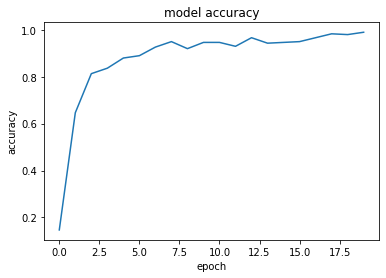

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'val'], loc='upper left')
plt.show()

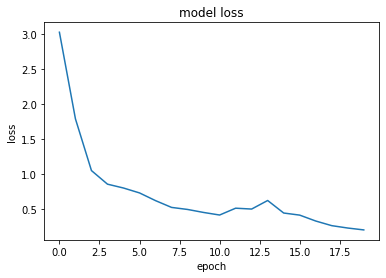

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

***SAVING THE MODEL***

***PICKLE FILE - lstmModel_updated.pkl***

In [ ]:
pickle_out = open("/content/drive/MyDrive/LSAvideos/lstmModel_updated.pkl", "wb")
pickle.dump(lstm_model, pickle_out)
pickle_out.close()

INFO:tensorflow:Assets written to: ram://2e1f67cf-1e8a-4d24-bdf8-fa0f6e593586/assets


INFO:tensorflow:Assets written to: ram://2e1f67cf-1e8a-4d24-bdf8-fa0f6e593586/assets


In [ ]:
with open('/content/drive/MyDrive/LSAvideos/lstmModel_updated.pkl', 'rb') as pickle_in:
     unpickled_model = pickle.load(pickle_in)

In [ ]:
lstm_model1 = unpickled_model
lstm_model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               2360320   
                                                                 
 dense_1 (Dense)             (None, 25)                6425      
                                                                 
Total params: 2,366,745
Trainable params: 2,366,745
Non-trainable params: 0
_________________________________________________________________


***PICKLE FILE - HISTORY OF TRAINED MODEL***

In [ ]:
pickle_out_history = open("/content/drive/MyDrive/LSAvideos/lstmModel_updated_history.pkl", "wb")
pickle.dump(history, pickle_out_history)
pickle_out_history.close()

INFO:tensorflow:Assets written to: ram://73c47138-0b3f-41fe-87fd-9fce71815937/assets


INFO:tensorflow:Assets written to: ram://73c47138-0b3f-41fe-87fd-9fce71815937/assets


In [ ]:
with open('/content/drive/MyDrive/LSAvideos/lstmModel_updated_history.pkl', 'rb') as pickle_in:
     unpickled_model_history = pickle.load(pickle_in)

***HDF5 FORMAT***

In [ ]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir -p saved_model_updated

In [ ]:
lstm_model.save('/content/drive/MyDrive/saved_model_updated/cip_model') 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved_model_updated/cip_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved_model_updated/cip_model/assets


In [ ]:
os.chdir("/content/drive/MyDrive")

In [ ]:
!ls saved_model_updated

# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_model_updated/cip_model

cip_model
assets	keras_metadata.pb  saved_model.pb  variables


#EXTRAS

**CONTINUE AFTERWARDS**

In [ ]:
#############DO NOT EXECUTE EVERY TIME########################
import os
import shutil
  
source = '/content/drive/MyDrive/LSAvideos/Frames_sample/testing_sample_frames/'
#destination = '/content/drive/MyDrive/LSAvideos/Sample_Frames/Output_of_cnn/'
  
allfiles = os.listdir(source)

#for f in allfiles:
  #if(f[-3:] == "npy"):
    #shutil.move(source + f, destination + f)

KeyboardInterrupt: ignored

In [ ]:
allfiles = os.listdir(source)
count = 0

for f in allfiles:
  count = count + 1
  print(f)

count

In [ ]:
sample_feature_frame = np.load("/content/drive/MyDrive/LSAvideos/Frames_sample/testing_sample_frames/001_001_001_1.jpg.npy")
print(sample_feature_frame.shape)
sample_feature_frame

In [ ]:
tf.keras.layers.LSTM

In [ ]:
sample_feature_frame = sample_feature_frame.reshape((1, sample_feature_frame.shape[0], sample_feature_frame.shape[1]))
sample_feature_frame.shape

In [ ]:
model = tf.keras.layers.LSTM(256, dropout=0.2)
output = model(sample_feature_frame)

In [ ]:
print(output.shape)
print(output)

In [ ]:
model1 = tf.keras.layers.Dense(30, activation='softmax')
output1 = model1(output)

In [ ]:
print(output1.shape)
print(output1)

In [ ]:
model = tf.keras.layers.LSTM(256, dropout=0.2)
output = model(sample_feature_frame)
print(output)
model1 = tf.keras.layers.Dense(30, activation='softmax')
output1 = model1(output)
print(output1)

In [ ]:
target_label = ['Opaque', 'Green', 'Yellow', 'Bright', 'Light-blue', 'Colors', 'Red', 'Women', 'Enemy', 'Son', 'Man', 'Away', 'Drawer', 'Born', 'Learn',
                'Call', 'Skimmer', 'Bitter', 'Sweet milk', 'Milk', 'Water', 'Food', 'Argentina', 'Uruguay', 'Country', 'Last name', 'Where', 'Mock', 'Birthday']

In [ ]:
for i, val in enumerate(target_label):
  print(i, val)

In [ ]:
def rnn_temporal_features(frames, input_size, num_classes):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.Input(shape=[frames, input_size]))
  model.add(tf.keras.layers.LSTM(256, dropout=0.2))
  model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

  model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

  return model

In [ ]:
temporal_features_model = rnn_temporal_features(num_frames_per_video, input_size, num_classes)
temporal_features_model.summary()

In [ ]:
def load_labels(label_list):
    label = {}
    
    count = 0

    for i, val in enumerate(label_list):
        label[val] = count
        count += 1

    return label

In [ ]:
labels = load_labels(target_label)
print(len(labels))
labels

In [ ]:
#One Hot encoding of Label
actual_label = labels['Learn']
y = []

y.append(actual_label)
y = np.array(y)
x = tf.keras.utils.to_categorical(y, num_classes, dtype ="uint8")
x

In [ ]:
num_classes = 25
num_frames_per_video = 180
input_size = 2048
print(num_classes, input_size, num_frames_per_video)

**TARGET LABEL ENCODING AND LINKING TO FILENAME**

In [ ]:
target_label = [['001', 'Opaque'], ['003', 'Green'], ['004', 'Yellow'], ['005', 'Bright'], ['006', 'Light-blue'], ['007', 'Colors'], ['008', 'Red'], ['009', 'Women'],
                ['010', 'Enemy'], ['011', 'Son'], ['012', 'Man'], ['013', 'Away'], ['014', 'Drawer'], ['015', 'Born'], ['016', 'Learn'], ['017', 'Call'], ['018', 'Skimmer'], 
                ['019', 'Bitter'], ['020', 'Sweet milk'], ['021', 'Milk'], ['022', 'Water'], ['023', 'Food'], ['024', 'Argentina'], ['025', 'Uruguay'], ['026', 'Country']]

In [ ]:
for i, val in enumerate(target_label):
  print(val[0], val[1])

In [ ]:
def load_labels(label_list):
    label = {}
    
    count = 0

    for i, val in enumerate(label_list):
        label[val[1]] = count
        count += 1

    return label

In [ ]:
labels = load_labels(target_label)
print(len(labels))
labels

In [ ]:
num_classes = 25
label_encoding = []

for i, val in enumerate(target_label):
  actual_label = labels[val[1]]
  
  y = []
  y.append(actual_label)
  y = np.array(y)
  
  label_encoding.append(tf.keras.utils.to_categorical(y, 25, dtype ="uint8"))

In [ ]:
label_encoding

In [ ]:
target_label_encoding = []
for i in range(num_classes):
  target_label_encoding.append([target_label[i][0], label_encoding[i]])

In [ ]:
target_label_encoding

**COMBINING FEATURE VECTOR AND TARGET LABEL ENCODING**

In [ ]:
from collections import deque

In [ ]:
number_of_videos = 500

In [ ]:
frames = []
allfiles = os.listdir(destination)
count = 0

for f in allfiles:
  temp = "/content/drive/MyDrive/LSAvideos/Sample_Frames/Output_of_cnn/" + f
  frames.append(np.load(temp))
  count = count + 1
  if count == 201:
    break

In [ ]:
frames

In [ ]:
#STORING THE DATA FOR THE PURPOSE OF TRAINING THE TEMPORAL FEATURE LEARNING MODEL
#deque() -> Doubly Ended Queue - implemented using Collections - preferred over LIST when there is a need for faster append and pop operations.

X = []
y = []

temp_list = deque()

#Outer FOR LOOP - range is number of videos
#Inner FOR LOOP - range is number of frames
for i in range(1):
  for j in range(201):
    features = frames[j]

    actual = "Colors"
    actual = labels[actual]

    if len(temp_list) == num_frames_per_video - 1:
        temp_list.append(features)
        flat = list(temp_list)
        X.append(np.array(flat))
        y.append(actual)
        temp_list.clear()
    else:
        temp_list.append(features)
        continue

for key in labels:
  print("%s\t\t%d" % (key, labels[key]))

X = np.array(X)
y = np.array(y)

print("Dataset shape: ", X.shape)

y = tf.keras.utils.to_categorical(y, num_classes, dtype ="uint8")
return X, y

In [ ]:
X = []
    y = []
    temp_list = deque()

    # Open and get the features.
    with open(input_data_dump, 'rb') as fin:
        frames = pickle.load(fin)
        for i, frame in enumerate(frames):

            features = frame[0]
            actual = frame[1].lower()

            # frameCount = frame[2]

            # Convert our labels into binary.
            actual = labels[actual]

            # Add to the queue.
            if len(temp_list) == num_frames_per_video - 1:
                temp_list.append(features)
                flat = list(temp_list)
                X.append(np.array(flat))
                y.append(actual)
                temp_list.clear()
            else:
                temp_list.append(features)
                continue

    print("Class Name\tNumeric Label")
    for key in labels:
        print("%s\t\t%d" % (key, labels[key]))

    # Numpy.
    X = np.array(X)
    y = np.array(y)

    print("Dataset shape: ", X.shape)

    # One-hot encoded categoricals.
    y = to_categorical(y, len(labels))

    # Split into train and test.
    if ifTrain:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        return X_train, X_test, y_train, y_test
    else:
        return X, y

In [ ]:
print(X.shape)
X

In [ ]:
print(y.shape)
y

**LSTM NETWORK**

In [ ]:
def rnn_temporal_features(frames, input_size, num_classes):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.Input(shape=[frames, input_size]))
  model.add(tf.keras.layers.LSTM(256, dropout=0.2))
  model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

  model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

  return model

In [ ]:
temporal_features_model = rnn_temporal_features(num_frames_per_video, input_size, num_classes)
temporal_features_model.summary()

In [ ]:
X_train, X_test, y_train, y_test = get_data(input_data_dump, num_frames_per_video, labels)

num_classes = len(labels)
size_of_each_frame = X_train.shape[2]

net = rnn_temporal_features(num_frames_per_video, size_of_each_frame, num_classes)

try:
    model = tflearn.DNN(net, tensorboard_verbose=0)
    model.load('checkpoints/' + model_file)
    print("\nModel already exists! Loading it")
    print("Model Loaded")
except Exception:
    model = tflearn.DNN(net, tensorboard_verbose=0)
    print("\nNo previous checkpoints of %s exist" % (model_file))

model.fit(X_train, y_train, validation_set=(X_test, y_test),
          show_metric=True, batch_size=batch_size, snapshot_step=100,
          n_epoch=10)

x = input("Do you wanna save the model and overwrite? y or n: ")
if(x.strip().lower() == "y"):
    model.save('checkpoints/' + model_file)